In [25]:
import numpy as np
import numpy.random as npr
from scipy import linalg as la
import matplotlib.pyplot as plt

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Covariance X: 
 [[ 0.97944789  0.86573727  2.82463305]
 [ 0.86573727  9.41303249 11.14450703]
 [ 2.82463305 11.14450703 16.79377313]] 

Eigenvalues:
 [2.51669184e+01+0.j 2.66813120e-17+0.j 2.01933514e+00+0.j] 

Eigenvectors:
 [[-0.11503932 -0.81649658  0.56577318]
 [-0.57788847 -0.40824829 -0.706667  ]
 [-0.80796712  0.40824829  0.42487936]] 

U:
 [[-0.11502557  0.56577597 -0.81649658]
 [-0.57790566 -0.70665295 -0.40824829]
 [-0.80795679  0.424899    0.40824829]] 

V transpose:
 [[ 5.54267315e-03 -5.95479357e-02  2.90970241e-02 ... -2.08527873e-02
   6.61922642e-03  2.39753850e-02]
 [ 3.36414292e-02  9.57126438e-03 -2.89981337e-02 ...  1.02153928e-02
   1.77275860e-02 -1.57524861e-02]
 [-1.86866055e-01  8.08623270e-01 -1.08112166e-02 ... -1.78146020e-02
   2.91535400e-04 -8.84652027e-03]
 ...
 [-2.48933702e-02  5.91629862e-03 -2.21155886e-02 ...  9.99054170e-01
  -3.33259396e-05  4.59998728e-04]
 [-8.32114586e-03  3.68657283e-03  1.46111760e-02 ...  2.03959925e-04
   9.99652246e-01  2.

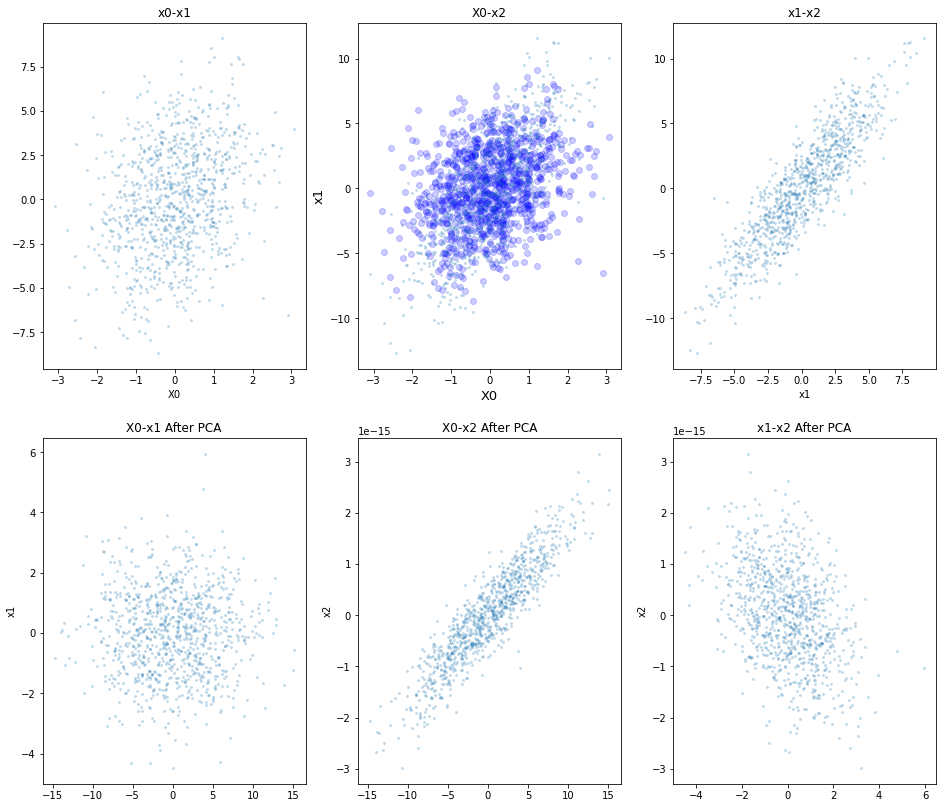

In [28]:
N = 1000

x0 = npr.normal(loc=0, scale=1, size=N)
x1 = x0 + npr.normal(loc=0, scale=3, size=N)
x2 = 2 * x0 + x1
X = [x0, x1, x2]

covariance = np.cov(X) #search data (covariance)
print("Covariance X: \n", covariance, '\n')
l, V = la.eig(covariance) #finding vectors and values of eigen
print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

U, S, Vt = la.svd(X) #search the values and the vectors of eigen with the SVD
print("U:\n", U, '\n')
print("V transpose:\n", Vt, '\n')
print("Spectrum:\n", S, '\n')

Xp = np.dot(U.T, X) # rotate and set new base data points
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 14))

axs[0, 1].scatter(X[0], X[1], alpha=0.2, color="b")
axs[0, 1].set_title("[x0,x1]", fontsize=21)
axs[0, 1].set_xlabel("x0", fontsize=13)
axs[0, 1].set_ylabel("x1", fontsize=13)

axs[0, 0].scatter(X[0], X[1], alpha=0.2, s=4)
axs[1, 0].scatter(Xp[0], Xp[1], alpha=0.2, s=4)
axs[0, 0].set_title("x0-x1")
axs[1, 0].set_title("X0-x1 After PCA")
axs[0, 0].set_xlabel("X0")
axs[1, 0].set_ylabel("x1")
axs[0, 0].set_xlabel("X0")
axs[1, 0].set_ylabel("x1")
#0-1
axs[0, 1].scatter(X[0], X[2], alpha=0.2, s=4)
axs[1, 1].scatter(Xp[0], Xp[2], alpha=0.2, s=4)
axs[0, 1].set_title("X0-x2")
axs[1, 1].set_title("X0-x2 After PCA")
axs[0, 1].set_xlabel("X0")
axs[1, 1].set_ylabel("x2")
axs[0, 1].set_xlabel("X0")
axs[1, 1].set_ylabel("x2")
#1-2
axs[0, 2].scatter(X[1], X[2], alpha=0.2, s=4)
axs[1, 2].scatter(Xp[1], Xp[2], alpha=0.2, s=4)
axs[0, 2].set_title("x1-x2")
axs[1, 2].set_title("x1-x2 After PCA")
axs[0, 2].set_xlabel("x1")
axs[1, 2].set_ylabel("x2")
axs[0, 2].set_xlabel("x1")
axs[1, 2].set_ylabel("x2")

plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Covariance matrix:
 [[ 0.9814876   0.87341014  2.83759052]
 [ 0.87341014  9.41363875 11.14281819]
 [ 2.83759052 11.14281819 16.82734488]] 

Eigenvalues:
 [2.51909337e+01+0.j 4.07183259e-03+0.j 2.02746573e+00+0.j] 

Eigenvectors:
 [[-0.11557052 -0.81844112  0.56284775]
 [-0.57728234 -0.40577967 -0.70858165]
 [-0.80832453  0.40681322  0.42557544]] 


With SVD:
Eigenvalues:
 [2.51933069e+01 2.02759232e+00 4.07183344e-03]
Eigenvectors:
 [[-0.11555716  0.56285062 -0.81844103]
 [-0.57729909 -0.70856792 -0.40577982]
 [-0.80831449  0.4255945   0.40681324]]


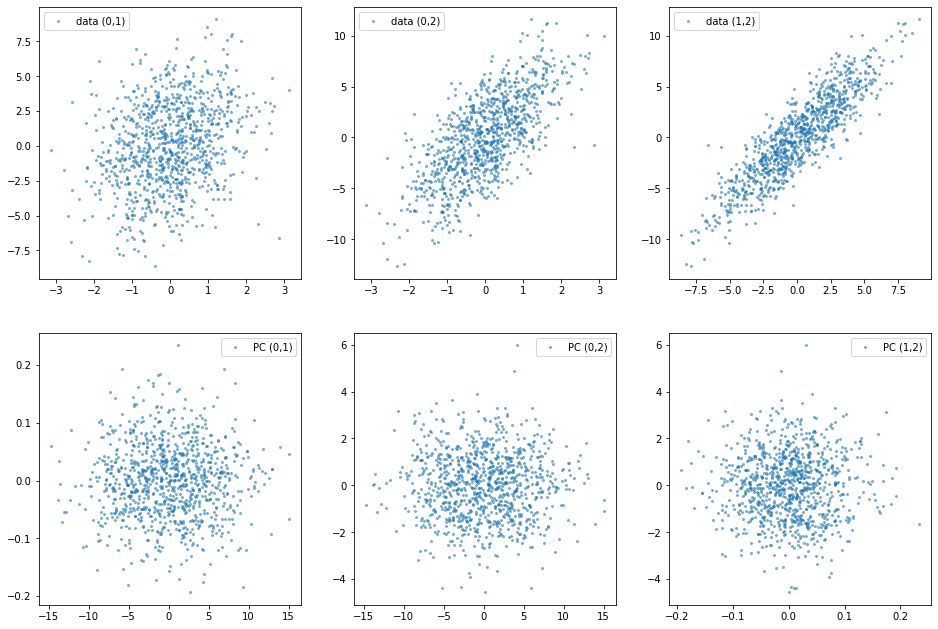

In [29]:
Noises = np.random.normal(loc=0, scale=1 / 50, size=(3, N, 10))
x_N = X + np.sum(Noises, axis=2)

#Reducind dimension with PCA
#the matrix of covariance
cv1 = np.cov(x_N)
print("Covariance matrix:\n", cv1, '\n')
l1 = np.real_if_close(l1)
l1, V1 = la.eig(cv1)
U1, s1, Vt1 = la.svd(x_N)
l_svd1 = s1 ** 2 / (N - 1)
V_svd1 = U1

print("Eigenvalues:\n", l1, '\n')
print("Eigenvectors:\n", V1, '\n')
print('\nWith SVD:\nEigenvalues:\n', l_svd1)
print('Eigenvectors:\n', V_svd1)

Xp1 = np.dot(V1.T, x_N)
_, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 11))

axs[0, 0].scatter(x_N[0, :], x_N[1, :], alpha=0.5, label='data (0,1)', s=4)
axs[0, 0].legend()
axs[0, 1].scatter(x_N[0, :], x_N[2, :], alpha=0.5, label='data (0,2)', s=4)
axs[0, 1].legend()
axs[0, 2].scatter(x_N[1, :], x_N[2, :], alpha=0.5, label='data (1,2)', s=4)
axs[0, 2].legend()
axs[1, 0].scatter(Xp1[0, :], Xp1[1, :], alpha=0.5, s=4, label='PC (0,1)')
axs[1, 0].legend()
axs[1, 1].scatter(Xp1[0, :], Xp1[2, :], alpha=0.5, s=4, label='PC (0,2)')
axs[1, 1].legend()
axs[1, 2].scatter(Xp1[1, :], Xp1[2, :], alpha=0.5, s=4, label='PC (1,2)')
axs[1, 2].legend()

plt.show()